# IIR-Filterentwurf

![dsp](img/dsp.jpg)

## Inhalt  
- [Butterworth Filter](#1.-Butterworth-Filter)  
- [Chebyshev Filter](#2.-Chebyshev-Filter)  

---- 

Im letzten Submodul haben wir über FIR-Filter diskutiert. FIR bietet viele Vorteile wie lineare Phase ohne Stabilitätsprobleme. Eine typische FIR hat die folgende Form: 
\begin{equation*}
y(k) = \sum_{i=0}^{M}a_{i} x(k-i) 
\end{equation*}  
Wenn $ M\rightarrow \infty $, kann die Amplitudenantwort steiler und idealer werden. Aber der Nachteil davon ist, dass mehr Punkte für die Berechnung gesammelt werden müssen, was manchmal nicht geeignet ist. Daher wird in der Technik häufig IIR (Infinite Impulse Response Filter) verwendet. Der größte Unterschied zwischen IIR und FIR besteht darin, dass die Ausgabe nicht nur von der Eingabe, sondern auch von der Ausgabe abhängt. Die Standardform von IIR lautet wie folgt:
\begin{equation*}
y(k) = \sum_{i=0}^{M} a_{i} x(k-i) - \sum_{i=0}^{N} b_{i} y(k-i)
\end{equation*}   
Bei IIR-Filter gibt es unterschiedliche Strukturen wie direkte, kaskadierte, parallele usw. Eine typische Struktur eines IIR-Systems sieht wie folgendes aus, die Darstellungsverfahren von solchen Digitalfiltern umfassen Differenzengleichung und Systemfunktion usw. 

![iir](img/iir.png)

__Der Unterschied zwischen FIR- und IIR-Systemen:__  

- FIR:  
    - Einheitsimpulsantwort: endliche Folge
    - keine Rückkopplungsschleife
    - kein Pol im Konvergenzbereich (Stabilität)
- IIR:  
    - Einheitsimpulsantwort: unendliche Folge
    - rekursive Struktur (Rückkopplungsschleife)
    - mindestens ein Pol ( $ a_{i} \neq  0 $ )

Im Allgemeinen wird beim Entwerfen eines digitalen IIR-Filters zuerst ein entsprechendes analoges Filter entworfen, und dann wird das analoge Filter durch eine durch   
[bilineare Transformation](https://en.wikipedia.org/wiki/Bilinear_transform) oder [Impulsantwort-Invarianzmethode](https://en.wikipedia.org/wiki/Impulse_invariance) in ein digitales Filter umgewandelt. Dies bedeutet, dass wir die Filterübertragungsfunktion $H(s)$ auf der komplexen Ebene von $s$ entwerfen müssen. Wenn sich alle Pole von $H(s)$ in der linken Halbebene von $s$ befinden, ist die Reaktion des Filters stabil. Die Komplexität liegt in der Bestimmung der Übertragungsfunktion des Analogfilters, die wir direkt über Software implementieren können.  

Spezifische Implementierungsschritte: Zuerst den Filtertyp, z. B. Butterworth, Chebyshev usw., bestimmen, und dann die Reihenfolge und Ausdruck der Übertragungsfunktion gemäß den Entwurfsparametern und der Filterberechnungsformel bestimmen.  

Als nächst entwerfen wir einige IIR-Filter und diskutieren ihre Eigenschaften. Wir können beispielsweise die entsprechenden Funktionen im __[scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html)__ benutzen, 

----

## 1. Butterworth Filter

Butterworth Filter besitzen einen maximal steilen Übergang zwischen Durchlass- und Sperrbereich bei absolut glattem Amplitudengang im Duchlassbereich (kein Überschwingen).   

Zuerst entwerfen wir einen Bandpassfilter mittels [signal.butter()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html): Angenommen, die Abtastfrequenz beträgt 1000 Hz. Um Frequenzkomponenten unter 290 Hz und über 440 Hz herauszufiltern, d.h., die Grenzfrequenz eines Bandpassfilters beträgt 130Hz bis 440Hz, dann ist $w_{n} = [130, 440]$. Daher ist ein Buttterworth Bandpassfilter wie folgend entwurfen:

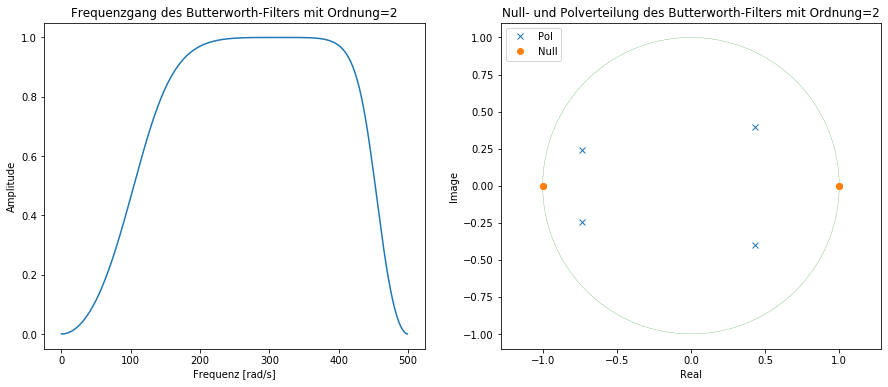

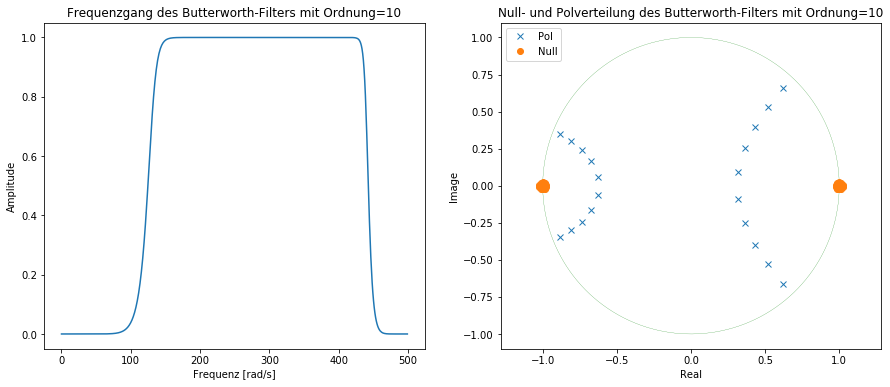

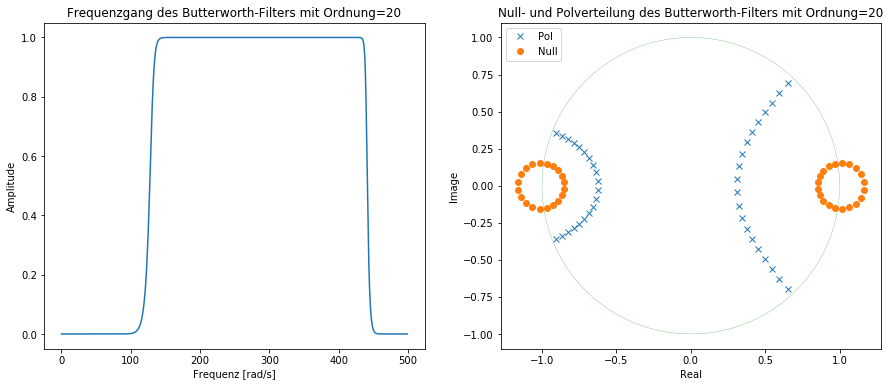

In [1]:
'''
Beispiel: Butterworth Bandpassfilterentwurf mit verschidenen Ordnungen
'''
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

for n in (2, 10, 20):  # Ordnung
    
    # Parameter
    wn = [130, 440]  # Grenzfrequenz
    fs_Hz = 1000  # Abtastfrequenz

    # Filterentwurf
    b, a = signal.butter(n, wn, 'Bandpass', analog=False, fs=fs_Hz)  # Filterkoeffizienten
    w, H = signal.freqz(b, a, fs=fs_Hz)  # Frequenzgang des Filters
    z, p, k = signal.tf2zpk(b, a)  # Null-Pol Verteilung

    # Plot
    plt.subplot(121)
    # plt.semilogx(w, abs(h))  # Log-plot
    plt.plot(w, abs(H))
    plt.title('Frequenzgang des Butterworth-Filters mit Ordnung=%d' %n)
    plt.xlabel('Frequenz [rad/s]')
    plt.ylabel('Amplitude')
    plt.subplot(122)
    plt.title('Null- und Polverteilung des Butterworth-Filters mit Ordnung=%d' %n)
    plt.xlabel('Real')
    plt.ylabel('Image')
    theta = np.arange(0, 2*np.pi, 0.01)
    plt.plot(np.cos(theta), np.sin(theta), c='g', lw=0.2)  # Einheitskreis
    plt.plot(np.real(p), np.imag(p), 'x', label=u"Pol")
    plt.plot(np.real(z), np.imag(z), 'o', label=u"Null")
    plt.axis("equal")
    plt.legend(loc="upper left")
    plt.gcf().set_size_inches(15, 6)
    plt.show()

Dabei gibt es die Funktion [signal.buttord()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.buttord.html) zur Auswahl geeigneter Ordnung. Anschließend entwerfen wir den Bandpassfilter mittels dieser Funktion, damit der Durchlassbereich innerhalb von 10 dB von 140Hz bis 430Hz ist, während mindestens -40 dB unter 130Hz und über 440Hz zurückgewiesen werden:

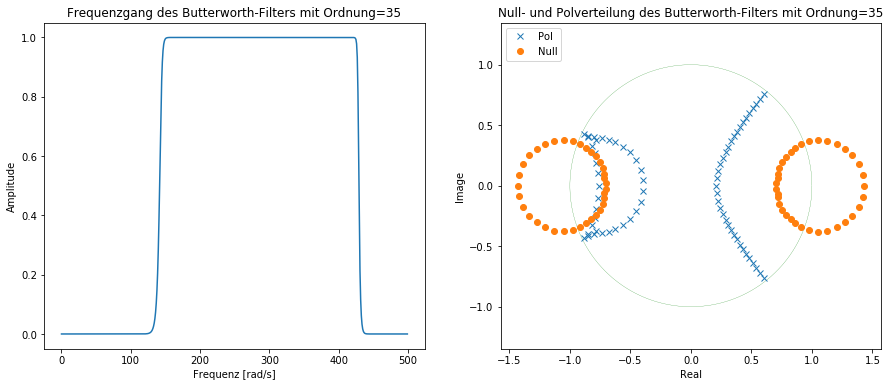

In [2]:
'''
Beispiel: Butterworth Bandpassfilterentwurf mittels Ordnungselektion
'''
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

# Ordnungselektion
fs_Hz = 1000  # Abtastfrequenz
n, wn = signal.buttord([140, 430], [130, 440], 10, 40, False, fs_Hz)

# Filterentwurf
b, a = signal.butter(n, wn, 'Bandpass', False, fs=fs_Hz)  # Filterkoeffizienten
w, H = signal.freqz(b, a, fs=fs_Hz)  # Frequenzgang des Filters
z, p, k = signal.tf2zpk(b, a)  # Null-Pol Verteilung

# Plot
plt.subplot(121)
plt.plot(w, abs(H))
plt.title('Frequenzgang des Butterworth-Filters mit Ordnung=%d' %n)
plt.xlabel('Frequenz [rad/s]')
plt.ylabel('Amplitude')
plt.subplot(122)
plt.title('Null- und Polverteilung des Butterworth-Filters mit Ordnung=%d' %n)
plt.xlabel('Real')
plt.ylabel('Image')
theta = np.arange(0, 2*np.pi, 0.01)
plt.plot(np.cos(theta), np.sin(theta), c='g', lw=0.2)  # Einheitskreis
plt.plot(np.real(p), np.imag(p), 'x', label=u"Pol")
plt.plot(np.real(z), np.imag(z), 'o', label=u"Null")
plt.axis("equal")
plt.legend(loc="upper left")
plt.gcf().set_size_inches(15, 6)
plt.show()

----

## 2. Chebyshev Filter

Beim Chebychev-Filter fällt die Amplitude im Übergangsbereich steiler ab als beim Butterworth-Filter. Dieser Vorteil wird durch eine gewisse
(einstellbare) Welligkeit im Durchlassbereich erkauft (unterhalb der Grenzfrequenz). 

Ähnlich wie Butterworth-Filterentwurf, beim Chebyshev-Filterentwurf gibt es auch Funktionen zur Ordnungselektion, daher können wir diese Funktionen direkt verwenden, um Filter mit geeigneter Ordnung zu entwerfen. Alle Details können Sie unten [scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html) finden.   

Außerdem gibt es eine allgemeine Funktion [signal.iirfilter()]() zum IIR-Filterentwurf, Anschließend werden wir diese Funktion benutzen, um Chebyshev-Typ-I und -II Filter Abtastfrequenz von 8000Hz zu entwerfen.

- __Chebyshev Typ I__

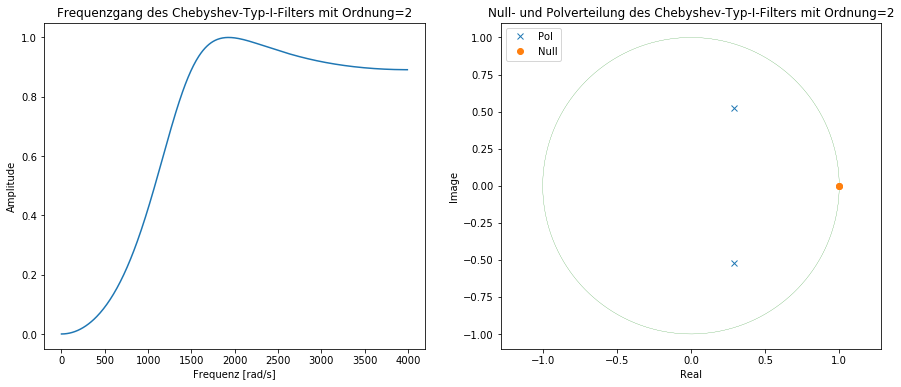

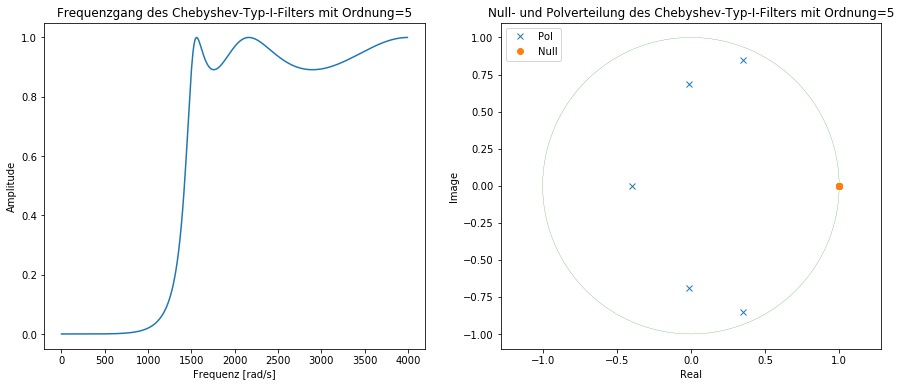

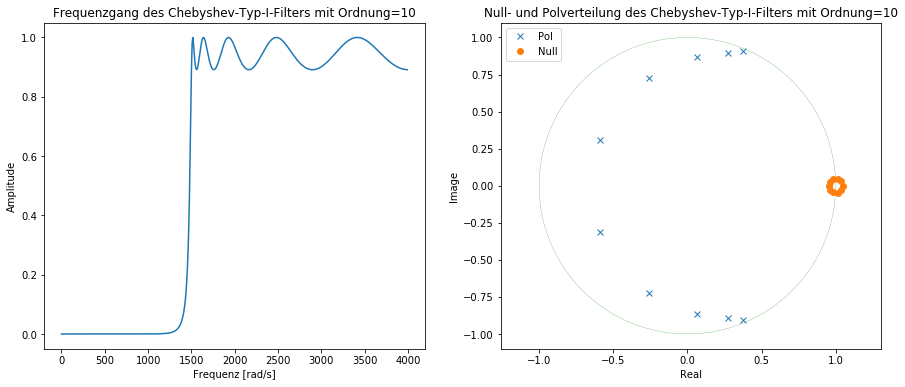

In [3]:
'''
Beispiel: Chebyshev Typ-I Hochpassfilterentwurf mit verschidenen Ordnungen
'''
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

for n in (2, 5, 10):  # Ordnung
    
    # Parameter
    wn = 1500  # Grenzfrequenz
    fs_Hz = 8000  # Abtastfrequenz

    # Filterentwurf
    b, a = signal.iirfilter(n, wn, rp=1, btype='highpass', analog=False, ftype='cheby1', fs=fs_Hz)
    w, H = signal.freqz(b, a, fs=fs_Hz)  # Frequenzgang
    z, p, k = signal.tf2zpk(b, a)  # Null-Pol Verteilung

    # Plot
    plt.subplot(121)
    plt.plot(w, abs(H))
    plt.title('Frequenzgang des Chebyshev-Typ-I-Filters mit Ordnung=%d' %n)
    plt.xlabel('Frequenz [rad/s]')
    plt.ylabel('Amplitude')
    plt.subplot(122)
    plt.title('Null- und Polverteilung des Chebyshev-Typ-I-Filters mit Ordnung=%d' %n)
    plt.xlabel('Real')
    plt.ylabel('Image')
    theta = np.arange(0, 2*np.pi, 0.01)
    plt.plot(np.cos(theta), np.sin(theta), c='g', lw=0.2)  # Einheitskreis
    plt.plot(np.real(p), np.imag(p), 'x', label=u"Pol")
    plt.plot(np.real(z), np.imag(z), 'o', label=u"Null")
    plt.axis("equal")
    plt.legend(loc="upper left")
    plt.gcf().set_size_inches(15, 6)
    plt.show()

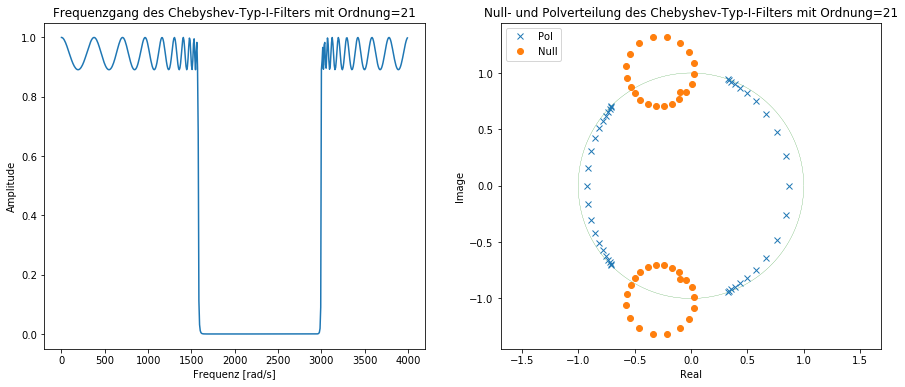

In [4]:
'''
Beispiel: Chebyshev Typ-I Bandsperrfilterentwurf mit Ordnungselektion
'''
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

# Ordnungselektion
fs_Hz = 8000  # Abtastfrequenz
n, wn = signal.cheb1ord([1500, 3000], [1590, 2990], 10, 40, False, fs_Hz)

# Filterentwurf
b, a = signal.iirfilter(n, wn, rp=1, btype='bandstop', analog=False, ftype='cheby1', fs=fs_Hz)
w, H = signal.freqz(b, a, fs=fs_Hz)  # Frequenzgang
z, p, k = signal.tf2zpk(b, a)  # Null-Pol Verteilung

# Plot
plt.subplot(121)
plt.plot(w, abs(H))
plt.title('Frequenzgang des Chebyshev-Typ-I-Filters mit Ordnung=%d' %n)
plt.xlabel('Frequenz [rad/s]')
plt.ylabel('Amplitude')
plt.subplot(122)
plt.title('Null- und Polverteilung des Chebyshev-Typ-I-Filters mit Ordnung=%d' %n)
plt.xlabel('Real')
plt.ylabel('Image')
theta = np.arange(0, 2*np.pi, 0.01)
plt.plot(np.cos(theta), np.sin(theta), c='g', lw=0.2)  # Einheitskreis
plt.plot(np.real(p), np.imag(p), 'x', label=u"Pol")
plt.plot(np.real(z), np.imag(z), 'o', label=u"Null")
plt.axis("equal")
plt.legend(loc="upper left")
plt.gcf().set_size_inches(15, 6)
plt.show()

- __Chebyshev Typ II__

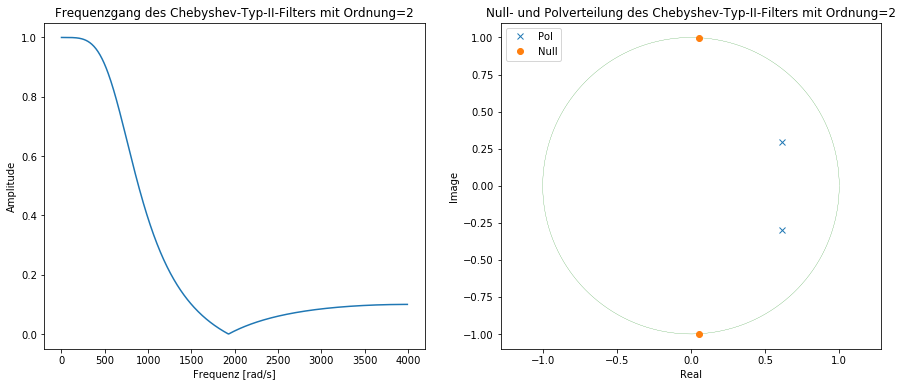

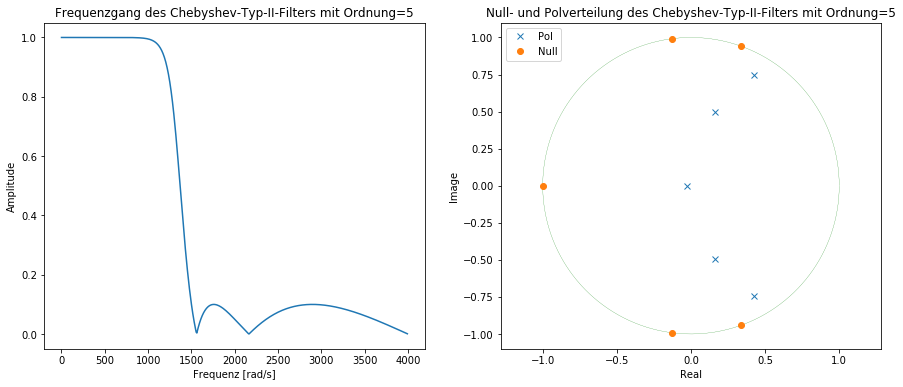

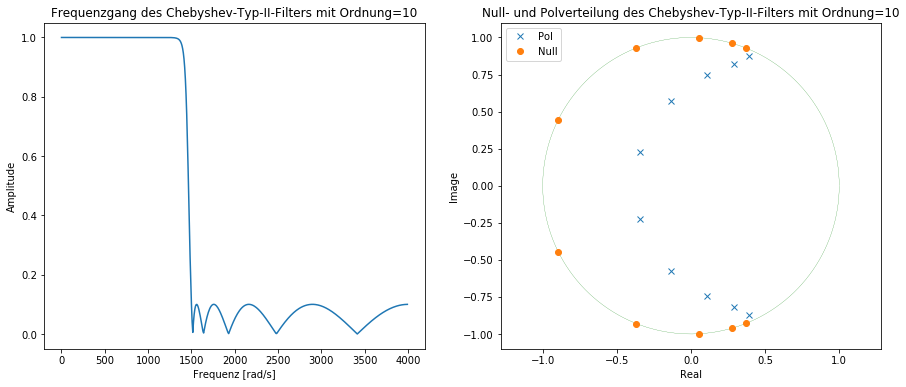

In [5]:
'''
Aufgabe: Chebyshev Typ-II Tiefpassilterentwurf mit verschidenen Ordnungen
'''
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

for n in (2, 5, 10):  # Ordnung
    
    # Parameter
    wn = 1500  # Grenzfrequenz
    fs_Hz = 8000  # Abtastfrequenz

    # Filterentwurf
    b, a = signal.iirfilter(n, wn, rs=20, btype='lowpass', analog=False, ftype='cheby2', fs=fs_Hz)
    w, H = signal.freqz(b, a, fs=fs_Hz)  # Frequenzgang
    z, p, k = signal.tf2zpk(b, a)  # Null-Pol Verteilung

    # Plot
    plt.subplot(121)
    plt.plot(w, abs(H))
    plt.title('Frequenzgang des Chebyshev-Typ-II-Filters mit Ordnung=%d' %n)
    plt.xlabel('Frequenz [rad/s]')
    plt.ylabel('Amplitude')
    plt.subplot(122)
    plt.title('Null- und Polverteilung des Chebyshev-Typ-II-Filters mit Ordnung=%d' %n)
    plt.xlabel('Real')
    plt.ylabel('Image')
    theta = np.arange(0, 2*np.pi, 0.01)
    plt.plot(np.cos(theta), np.sin(theta), c='g', lw=0.2)  # Einheitskreis
    plt.plot(np.real(p), np.imag(p), 'x', label=u"Pol")
    plt.plot(np.real(z), np.imag(z), 'o', label=u"Null")
    plt.axis("equal")
    plt.legend(loc="upper left")
    plt.gcf().set_size_inches(15, 6)
    plt.show()

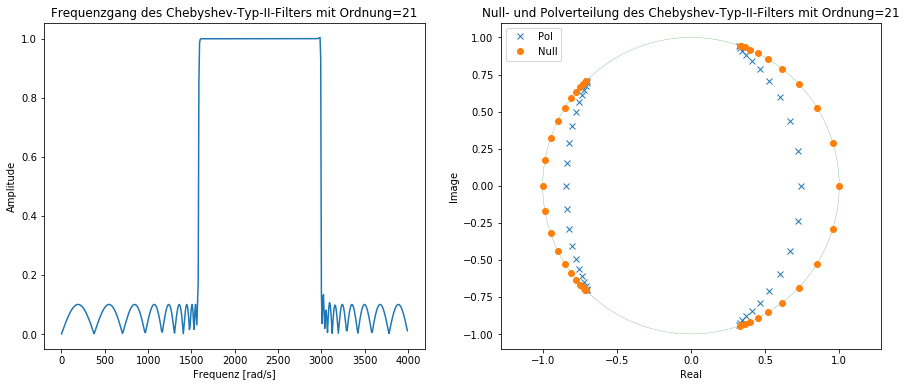

In [6]:
'''
Aufgabe: Chebyshev Typ-II Bandpassfilterentwurf mit Ordnungselektion
'''
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

# Ordnungselektion
fs_Hz = 8000  # Abtastfrequenz
n, wn = signal.cheb2ord([1590, 2990], [1500, 3000], 10, 40, False, fs_Hz)

# Filterentwurf
b, a = signal.iirfilter(n, wn, rs=20, btype='bandpass', analog=False, ftype='cheby2', fs=fs_Hz)
w, H = signal.freqz(b, a, fs=fs_Hz)  # Frequenzgang
z, p, k = signal.tf2zpk(b, a)  # Null-Pol Verteilung

# Plot
plt.subplot(121)
plt.plot(w, abs(H))
plt.title('Frequenzgang des Chebyshev-Typ-II-Filters mit Ordnung=%d' %n)
plt.xlabel('Frequenz [rad/s]')
plt.ylabel('Amplitude')
plt.subplot(122)
plt.title('Null- und Polverteilung des Chebyshev-Typ-II-Filters mit Ordnung=%d' %n)
plt.xlabel('Real')
plt.ylabel('Image')
theta = np.arange(0, 2*np.pi, 0.01)
plt.plot(np.cos(theta), np.sin(theta), c='g', lw=0.2)  # Einheitskreis
plt.plot(np.real(p), np.imag(p), 'x', label=u"Pol")
plt.plot(np.real(z), np.imag(z), 'o', label=u"Null")
plt.axis("equal")
plt.legend(loc="upper left")
plt.gcf().set_size_inches(15, 6)
plt.show()

----

### References

1. Titelbild von [Avon Ampo](https://www.eeweb.com/audio-signal-processing/)  
2. DSP Guide: [The Scientist and Engineer's Guide to
Digital Signal Processing](http://www.dspguide.com/pdfbook.htm)
3. Python-Modul von Signalverarbeitung: [scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html)